In [1]:
 %pylab inline

Populating the interactive namespace from numpy and matplotlib


# Simulated Annealing

## 1D Energy function

In [2]:
def fx(x):
    return x*x-2.0*cos(2*pi*x)

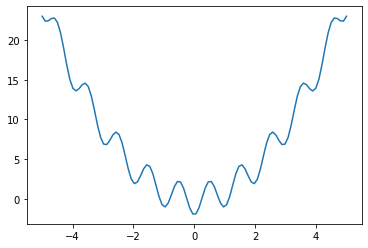

In [3]:
xs=linspace(-5,5,100)
plot(xs,fx(xs))

In [4]:

T0 = 10.0  #initial temperature
Tf = 0.01   #final temperature
tau = 500 #relaxtion time
sigma = 0.2 #size of step

T= T0 #temperature
N=1 # 1D

x=4.0*(2.0*(0.5-random.random())) #initial position 
E0 = fx(x)
xs = [1.0*x]
iter = 0

while T >= Tf:
    iter+=1
    
    for ns in range(N): # sweep over all the degrees of freedom in the system
     
        xtmp = 1.0*x # store
        x += normal(scale=sigma) #random number
        Ef = fx(x)
        
        #metropolis
        if Ef > E0: #energy went up
            if random.random() > exp(-(Ef-E0)/T): #bad move
                x = 1.0*xtmp
            else: 
                E0 = Ef
        else:
            E0 = Ef
        
        xs.append(1.0*x)   
        
    T = T0*exp(-iter/tau)

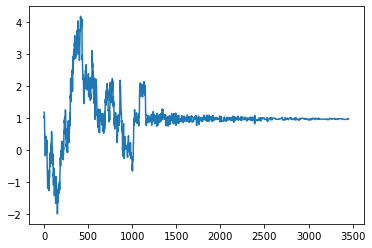

In [5]:
plot(xs)

so we got to the global minimum around 3500.

## Finite cluster shape


In [103]:
def VLJ(r2,eps):
    r6 = r2*r2*r2
    r12 = r6*r6
    return 4.0*eps*(1./r12-1./r6)

In [104]:
def Etot(rs,eps): #compute total energy of sys
    E=0.0
    N=len(rs)
    for i in range(N):
        for j in range(i+1,N): 
            dr2 = sum((rs[i]-rs[j])**2)
            E += VLJ(dr2,eps)
    return E

In [129]:
tau = 1000

T0 = 1.5  #initial temperature
Tf = 0.001   #final temperature
sigma = 0.2 #size of step
eps=1.5
sigr=0.25
N=10 
L= 10.0

rs=L*(random.random((N,2))) #initial position 
rs[0] = array([0.5*L,0.5*L])

T= T0 #temperature
iters = 0
E0=Etot(rs,eps) #initial energy
Es=[E0]
print(E0)
Emin= 10.0
while T >= Tf:
    iters += 1
#for iters in range(10):
    for ns in range(1,N): # sweep over all the degrees of freedom in the system
        ii = int((N-1)*random.random())+1
        rtmp = 1.0*rs[ii]# store
        rs[ii] += normal(scale=sigma, size=2) #random number
        
        rs[ii] = rs[ii] - floor(rs[ii]/L)*L
        Ef = Etot(rs, eps)
        
        #metropolis
        if Ef > E0: #energy went up
            if random.random() > exp(-(Ef-E0)/T): #bad move
                rs[ii] = 1.0*rtmp
            else: 
                E0 = Ef
        else:
            E0 = Ef   
        if E0 < Emin:
            Emin =1.*E0
            rmin=1.*rs
    Es.append(E0)   
    T = T0*exp(-iters/tau)
print(Emin)

-3.804157873462309
-27.628016619417284


(0, 10.0)

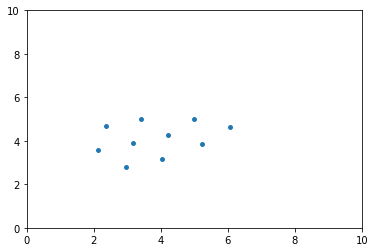

In [130]:
scatter(rmin[:,0],rmin[:,1],s=15)
xlim(0,L)
ylim(0,L)

(-30, 0)

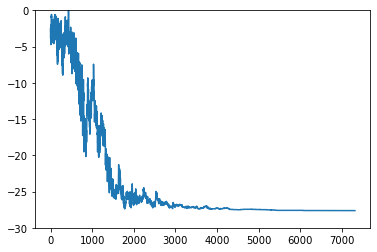

In [131]:
plot(Es)
ylim(-30,0)

## Number partitioning

In [169]:
tau = 2000

T0 = 2.0  #initial temperature
Tf = 0.001   #final temperature
sigma = 0.2 #size of step

nmax=100

N=15
L= 10.0

rs=L*(random.random((N,2))) #initial position 
rs[0] = array([0.5*L,0.5*L])

ns=random.choice(arange(1,nmax,1.0),size=N)
si= random.choice([-1.0,1.0],size=N)

print(ns)
print(si)

[18. 60. 72. 17. 67. 57. 90. 33. 67.  3. 16. 71. 99. 96. 34.]
[ 1.  1. -1. -1.  1.  1. -1. -1.  1.  1.  1. -1.  1.  1. -1.]


In [170]:
def Etot(ns,si):
    return dot(ns,si)**2.0

In [171]:
Etot(ns,si)

27556.0

In [211]:
tau = 500
T0 = 4000  #initial temperature
Tf = 1  #final temperature

T= T0 #temperature

iters = 0
E0=Etot(ns,si) #initial energy
Es=[E0]

Emin = nmax

while T >= Tf:
    iters += 1
#for iters in range(10):

    for k in range(N): # sweep over all the degrees of freedom in the system
        ii = int(N*random.random())
        stmp = 1.0*si[ii]# store
        si[ii] *= -1.0 #flip it to the other individual.
        
        Ef = Etot(ns,si)
        
        #metropolis
        if Ef > E0: #energy went up
            if random.random() > exp(-(Ef-E0)/T): #bad move
                si[ii] = 1.0*stmp
            else: 
                E0 = Ef
        else:
            E0 = Ef  
            
        if E0 < Emin:
            Emin = 1.0*E0
            smin = 1.0*si
    Es.append(E0)   
    T = T0*exp(-iters/tau)
print(Emin)

0.0


(0, 5000)

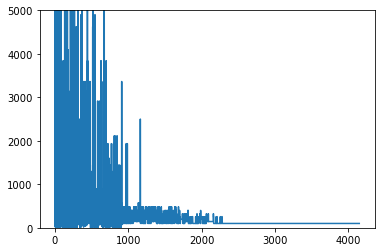

In [212]:
plot(Es)
ylim(0,5000)

In [204]:
smin

array([-1.,  1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,
       -1., -1.])

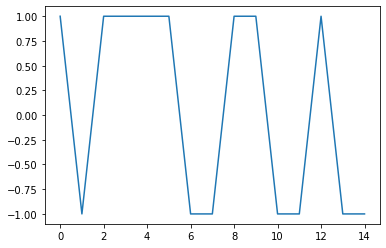

In [214]:
plot(smin)

## Traveling Salesperson Problem (TSP):

In [2]:
def Distance(x, rs):
    d = 0.0
    for i in range(1,len(x)):
        d += sum((rs[x[i]]-rs[x[i-1]])**2)
    return d

In [3]:
rs = genfromtxt('cities_small.txt', delimiter=',')
N = len(rs)
print(rs)

[[31.73326817 33.16489901]
 [79.91375896 28.73546987]
 [54.41587185 74.92369396]
 [62.8615836  37.18895003]
 [27.54563398 43.1951362 ]
 [88.93525894 89.311046  ]
 [17.54240224 90.47173172]
 [27.58946436 81.0922989 ]
 [42.98271887 33.58515661]
 [ 5.89981652 58.01087008]]


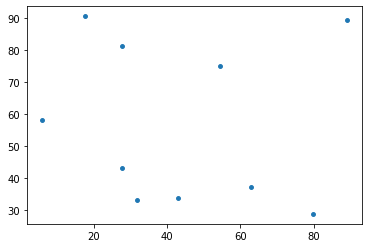

In [4]:
scatter(rs[:,0], rs[:,1],s=15)


In [5]:
tau = 50000
T0 = 10000  #initial temperature
Tf = 10 #final temperature

T= T0 #temperature
x = array([0] + list(arange(1,N)) + [0])
iters = 0
d0 = Distance(x, rs)     #initial energy
ds=[]

nmax=10000
dmin = nmax

while T >= Tf:
    iters += 1
#for iters in range(10):

    ii = int((N-1)*random.random()) + 1
    jj = int((N-1)*random.random()) + 1
    while jj == ii:
        jj = int((N-1)*random.random()) + 1
    x1 = x[ii]
    x2 = x[jj]
    x[ii] = x2 #swapping
    x[jj] = x1 
    

    df = Distance(x, rs) 
        
        #metropolis
    if df > d0: #energy went up
        if random.random() > exp(-(df-d0)/T): #bad move
            x[ii] = x1
            x[jj] = x2
        else: 
            d0 = df
    else:
        d0 = df  
            
    if d0 < dmin:
        dmin = d0
        xmin = 1.0*x
    ds.append(d0)   
    T = T0*exp(-iters/tau)
    
print(dmin)

8988.56493405193


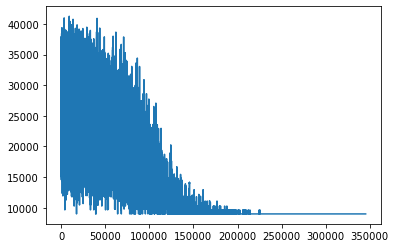

In [64]:
plot(ds)

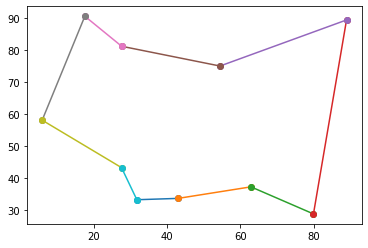

In [65]:
for i in range(1, len(x)):
    plot([rs[x[i-1]][0], rs[x[i]][0]], [rs[x[i-1]][1], rs[x[i]][1]], 'o-')
plot(rs[0][0], rs[0][1])

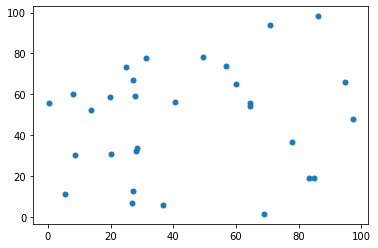

In [2]:
rs = genfromtxt('cities_large.txt', delimiter=',')
N = len(rs)
scatter(rs[:,0], rs[:,1],s=25)

In [5]:
tau = 50000
T0 = 10000  #initial temperature
Tf = 10 #final temperature

T= T0 #temperature
x = array([0] + list(arange(1,N)) + [0])
iters = 0
d0 = Distance(x, rs)     #initial energy
ds=[]

nmax=10000
dmin = nmax

while T >= Tf:
    iters += 1
#for iters in range(10):

    ii = int((N-1)*random.random()) + 1
    jj = int((N-1)*random.random()) + 1
    while jj == ii:
        jj = int((N-1)*random.random()) + 1
    x1 = x[ii]
    x2 = x[jj]
    x[ii] = x2 #swapping
    x[jj] = x1 
    

    df = Distance(x, rs) 
        
        #metropolis
    if df > d0: #energy went up
        if random.random() > exp(-(df-d0)/T): #bad move
            x[ii] = x1
            x[jj] = x2
        else: 
            d0 = df
    else:
        d0 = df  
            
    if d0 < dmin:
        dmin = d0
        xmin = 1.0*x
    ds.append(d0)   
    T = T0*exp(-iters/tau)
    
print(dmin)

9728.676604224802


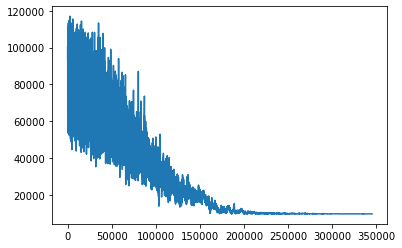

In [6]:
plot(ds)

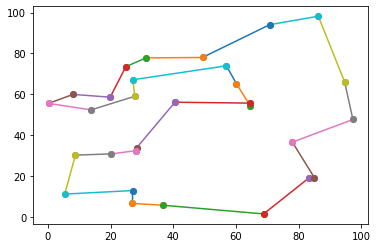

In [7]:
for i in range(1, len(x)):
    plot([rs[x[i-1]][0], rs[x[i]][0]], [rs[x[i-1]][1], rs[x[i]][1]], 'o-')
plot(rs[0][0], rs[0][1])